# Projet Fraude 



In [3]:
import warnings
import pandas as pd
warnings.simplefilter('ignore')

### Importer les dataset

In [4]:
path = './dataset/'
fd = pd.read_csv(path+'Fraud_Data.csv')
ip_address = pd.read_csv(path+'IpAddress_to_Country.csv')
#target --> class : 1 Fraud | 0 ok 
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
ip_address

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [6]:
#fd1 = pd.merge(fd, ip_address, left_on = ['ip_address'], right_on = ['upper_bound_ip_address'], how='left')
#fd1.describe()
fd['country'] = (fd.ip_address.apply(lambda country: ip_address.query('lower_bound_ip_address <= @country <= upper_bound_ip_address').index.values).apply(lambda country: country[0] if len(country) else -1))

In [7]:
pd.merge(fd, ip_address, left_on='country', right_index=True, how='left').drop('lower_bound_ip_address',1).drop('upper_bound_ip_address',1).drop('country_x',1)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_y
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Créer une nouvelle colonne `country` en effectuant une jointure entre les deux dataset 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### Créer une nouvelle variable `time_diff` qui sera la différence entre les variables `purchase_time` et `signup_time`

In [8]:
from datetime import datetime

purchase_time = pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in fd['purchase_time']])
signup_time = pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in fd['signup_time']])

time_diff = purchase_time.sub(signup_time, axis=0)


fd['time_diff'] = (purchase_time.sub(signup_time, axis=0))
fd

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4554,52 days 03:51:22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1017,0 days 04:59:04
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,43965,0 days 00:00:01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-1,5 days 16:41:25
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1604,50 days 11:31:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,126332,60 days 21:27:13
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,41568,10 days 18:41:10
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,46951,77 days 08:00:16
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,135347,59 days 13:28:39


### Regroupper les `user_id` par `device_id`  afin d'avoir le nombre de device par client  

In [9]:
device_num = fd[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_num = device_num.rename(columns={'user_id': 'device_num'})
fd = fd.merge(device_num, how='left', on='device_id')
fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4554,52 days 03:51:22,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1017,0 days 04:59:04,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,43965,0 days 00:00:01,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-1,5 days 16:41:25,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1604,50 days 11:31:01,1


### Faire de même pour les `ip_address` 

In [10]:
ip_num = fd[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_num = ip_num.rename(columns={'user_id': 'ip_num'})

fd = fd.merge(ip_num, how='left', on='ip_address')
#fd.drop('device_num_x',1)
fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4554,52 days 03:51:22,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1017,0 days 04:59:04,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,43965,0 days 00:00:01,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-1,5 days 16:41:25,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1604,50 days 11:31:01,1,1


### Traiter les variables `signup_time` & `purchase_time` afin de les différentier suivant la semaine et le week end  

In [11]:
#fd.drop('device_num_x',0)
fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4554,52 days 03:51:22,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1017,0 days 04:59:04,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,43965,0 days 00:00:01,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-1,5 days 16:41:25,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1604,50 days 11:31:01,1,1


In [12]:
fd['signup_day'] = pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S').day for date in fd['signup_time']])
fd['signup_week'] = pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S').isocalendar()[1] for date in fd['signup_time']])

fd['purchase_day'] = pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S').day for date in fd['purchase_time']])
fd['purchase_week'] = pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S').isocalendar()[1] for date in fd['purchase_time']])

#pd.DataFrame([datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in fd['signup_time']])

fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4554,52 days 03:51:22,1,1,24,9,18,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1017,0 days 04:59:04,1,1,7,23,8,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,43965,0 days 00:00:01,12,12,1,1,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-1,5 days 16:41:25,1,1,28,18,4,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1604,50 days 11:31:01,1,1,21,30,9,37


In [13]:
time_diff_ms = fd.time_diff.apply(lambda time_diff_ms: time_diff_ms.seconds*1000)
fd['time_diff_ms'] = time_diff_ms

fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week,time_diff_ms
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4554,52 days 03:51:22,1,1,24,9,18,16,13882000
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1017,0 days 04:59:04,1,1,7,23,8,24,17944000
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,43965,0 days 00:00:01,12,12,1,1,1,1,1000
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-1,5 days 16:41:25,1,1,28,18,4,19,60085000
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1604,50 days 11:31:01,1,1,21,30,9,37,41461000


### Définir vos variables de travail (X,y)

,signup_day,signup_week,purchase_day,purchase_week,purchase_value,source,browser,sex,age,country,time_diff,device_num,ip_num,class
0,1,9,5,16,34,SEO,Chrome,M,39,Japan,13882,1,1,0
1,6,23,0,24,16,Ads,Chrome,F,53,United States,17944,1,1,0
2,3,1,3,1,15,SEO,Opera,M,53,United States,1,12,12,1
3,1,18,0,19,44,SEO,Safari,M,41,NA,60085,1,1,0
4,1,30,2,37,39,Ads,Safari,M,45,United States,41461,1,1,0


In [14]:
data = [fd['signup_day'], fd['signup_week'], fd['purchase_day'], fd['purchase_week'], fd['purchase_value'], fd['source'], fd['browser'], fd['sex'], fd['age'], fd['country'], fd['time_diff_ms'], fd['device_num'], fd['ip_num'], fd['class']]
headers = ["s_day",'s_week', 'p_day', 'p_week','p_value','source','browser','sex','age','country','time_diff','device_num','ip_num','class']

df0 = pd.concat(data, axis=1, keys=headers)
df0

,s_day,s_week,p_day,p_week,p_value,source,browser,sex,age,country,time_diff,device_num,ip_num,class
0,24,9,18,16,34,SEO,Chrome,M,39,4554,13882000,1,1,0
1,7,23,8,24,16,Ads,Chrome,F,53,1017,17944000,1,1,0
2,1,1,1,1,15,SEO,Opera,M,53,43965,1000,12,12,1
3,28,18,4,19,44,SEO,Safari,M,41,-1,60085000,1,1,0
4,21,30,9,37,39,Ads,Safari,M,45,1604,41461000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,27,5,29,13,43,SEO,Chrome,M,28,126332,77233000,2,1,1
151108,15,20,26,22,35,SEO,Safari,M,32,41568,67270000,1,1,0
151109,3,10,20,21,40,SEO,IE,F,26,46951,28816000,1,1,0
151110,9,28,7,37,46,SEO,Chrome,M,37,135347,48519000,2,1,0


In [15]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   s_day       151112 non-null  int64 
 1   s_week      151112 non-null  int64 
 2   p_day       151112 non-null  int64 
 3   p_week      151112 non-null  int64 
 4   p_value     151112 non-null  int64 
 5   source      151112 non-null  object
 6   browser     151112 non-null  object
 7   sex         151112 non-null  object
 8   age         151112 non-null  int64 
 9   country     151112 non-null  int64 
 10  time_diff   151112 non-null  int64 
 11  device_num  151112 non-null  int64 
 12  ip_num      151112 non-null  int64 
 13  class       151112 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 17.3+ MB


### Afficher les informations du dataset afin de vizualiser les variables numeriques et categoriques

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
signup_day        151112 non-null int64
signup_week       151112 non-null int64
purchase_day      151112 non-null int64
purchase_week     151112 non-null int64
purchase_value    151112 non-null int64
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
country           151112 non-null object
time_diff         151112 non-null int64
device_num        151112 non-null int64
ip_num            151112 non-null int64
class             151112 non-null int64
dtypes: int64(10), object(4)
memory usage: 17.3+ MB


In [16]:
y = fd['class']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

### Traiter les variables catégoriques

In [17]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df0['source'] = lb.fit_transform(df0['source'])
df0['browser'] = lb.fit_transform(df0['browser'])
df0['sex'] = lb.fit_transform(df0['sex'])
df0['country'] = lb.fit_transform(df0['country'])

df0.head()

,s_day,s_week,p_day,p_week,p_value,source,browser,sex,age,country,time_diff,device_num,ip_num,class
0,24,9,18,16,34,2,0,1,39,1345,13882000,1,1,0
1,7,23,8,24,16,0,0,0,53,344,17944000,1,1,0
2,1,1,1,1,15,2,3,1,53,13905,1000,12,12,1
3,28,18,4,19,44,2,4,1,41,0,60085000,1,1,0
4,21,30,9,37,39,0,4,1,45,582,41461000,1,1,0


### Spliter vos variables 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df0,y)

### Instancier un `RandomForestClassifier` et l'entrainer sur vos données 

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=50, min_samples_leaf=3, min_samples_split=3, oob_score=True)
clf_forest.fit(X_train, y_train)

clf_forest

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=20, oob_score=True)

In [56]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(clf_forest, X_train, y_train, scoring='accuracy').mean()
print("Accuracy moyenne pour 5 fold cross validation : {}".format(round(scores*100,2)))


Accuracy moyenne pour 5 fold cross validation : 100.0


### Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [21]:
from sklearn.metrics import classification_report
preds = clf_forest.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34284
           1       1.00      1.00      1.00      3494

    accuracy                           1.00     37778
   macro avg       1.00      1.00      1.00     37778
weighted avg       1.00      1.00      1.00     37778



### Afficher les `feature_importances_`

In [26]:
importances = clf_forest.feature_importances_
importances

array([3.13845906e-03, 3.20506122e-02, 1.26001608e-03, 7.92146246e-02,
       7.78813875e-04, 3.14156152e-04, 2.74669941e-04, 1.50451816e-04,
       7.10750347e-04, 1.07459610e-03, 1.32150971e-01, 5.32473657e-02,
       6.33963348e-02, 6.32238178e-01])

In [62]:
feature_imp = pd.Series(clf_forest.feature_importances_,index=df0.columns.tolist()).sort_values(ascending=False)
feature_imp

class         0.632238
time_diff     0.132151
p_week        0.079215
ip_num        0.063396
device_num    0.053247
s_week        0.032051
s_day         0.003138
p_day         0.001260
country       0.001075
p_value       0.000779
age           0.000711
source        0.000314
browser       0.000275
sex           0.000150
dtype: float64

time_diff         0.274568
purchase_week     0.145555
ip_num            0.137471
device_num        0.089743
signup_week       0.084465
purchase_value    0.064497
age               0.054936
country           0.040763
signup_day        0.033725
purchase_day      0.029160
browser           0.021741
source            0.013733
sex               0.009643
dtype: float64

### Vizualiser les sur un graphique 

<AxesSubplot:>

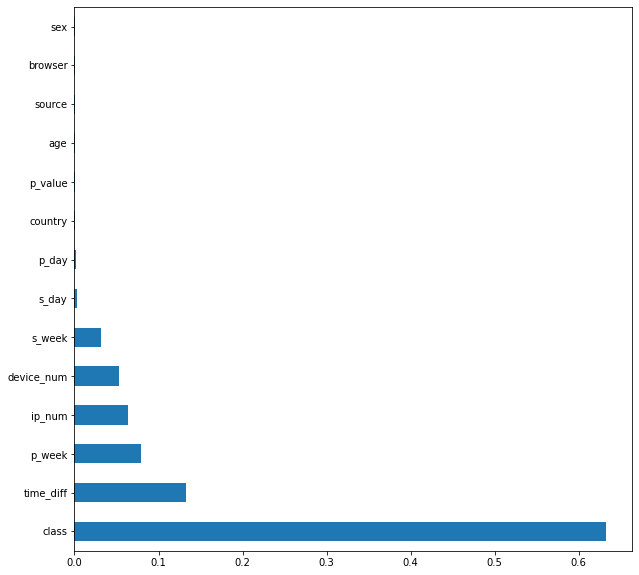

In [33]:
pd.Series(clf_forest.feature_importances_, index=df0.columns).nlargest(14).plot(kind="barh",figsize=(10,10))

Text(0.5, 1.0, 'Visualizing Important Features')

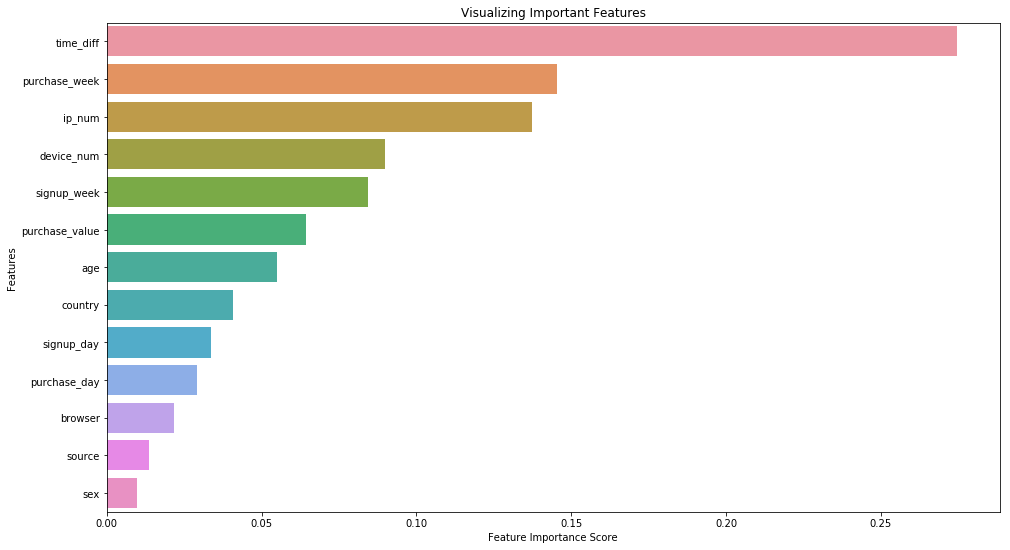

### Afficher le `Classification report`

In [41]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34284
           1       1.00      1.00      1.00      3494

    accuracy                           1.00     37778
   macro avg       1.00      1.00      1.00     37778
weighted avg       1.00      1.00      1.00     37778



              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41177
           1       1.00      0.55      0.71      4157

   micro avg       0.96      0.96      0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



### Traçer la courbe AUC 

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

svc_forest = SVC(random_state=42)
svc_forest.fit(X_train, y_train)
#clf_forest = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=50, min_samples_leaf=3, min_samples_split=3, oob_score=True)
#clf_forest.fit(X_train, y_train)

svc_forest

SVC(random_state=42)

In [ ]:
#correction
#test_fpr, test_tpr, _ = roc_curve(y_test.values, y_pred)
#test_auc = np.round(auc(test_fpr, test_tpr), 3)


In [ ]:
#test_fpr = np.insert(test_fpr, 0, 0)
#test_tpr = np.insert(test_tpr, 0, 0)

#fig, ax = plt.subplots(figsize=(8, 6))
#ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
#ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
#ax.plot(test_fpr, test_tpr, 'k--', label='Chance Curve')
#ax.set_xlabel('False Positive Rate', fontsize=12)
#ax.set_ylabel('True Positive Rate', fontsize=12)
#ax.grid(True)
#ax.legend(fontsize=12)
#plt.show()


Text(0.5, 0.98, 'ROC curve comparison')

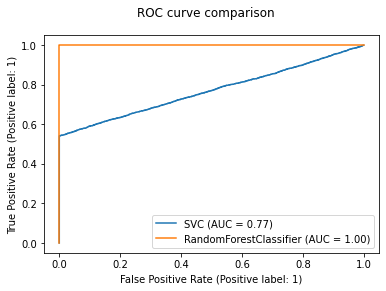

In [45]:
svc_disp = plot_roc_curve(svc_forest, X_test, y_test)
rfc_disp = plot_roc_curve(clf_forest, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

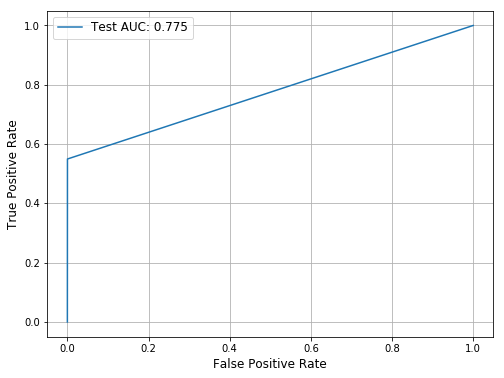

### Afficher la matrice de confusion 
Qu'en pensez vous ? 

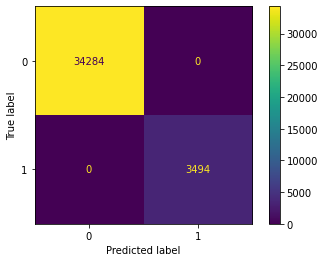

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

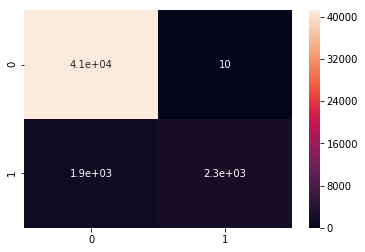

### Faire une selection de certaine variables et spliter vos varibales 

Shape du dataset d'entrainement : (105778, 4) | Shape du dataset de test : (45334, 4)


### Entrainer un classifieur `LogisticRegression` sur ces variables 

In [67]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(df0,y)
clf.predict(X_test)
clf.predict_proba(X_test)
clf.score(df0, y)

0.9063542273280746

L'accuracy moyenne pour 10 'fold cross validation' est 95.39%
